In [1]:
import pickle
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-dark")

In [2]:
with open("data/01_knapsack_sample_problem.pkl", "rb") as f:
    data = pickle.load(f)

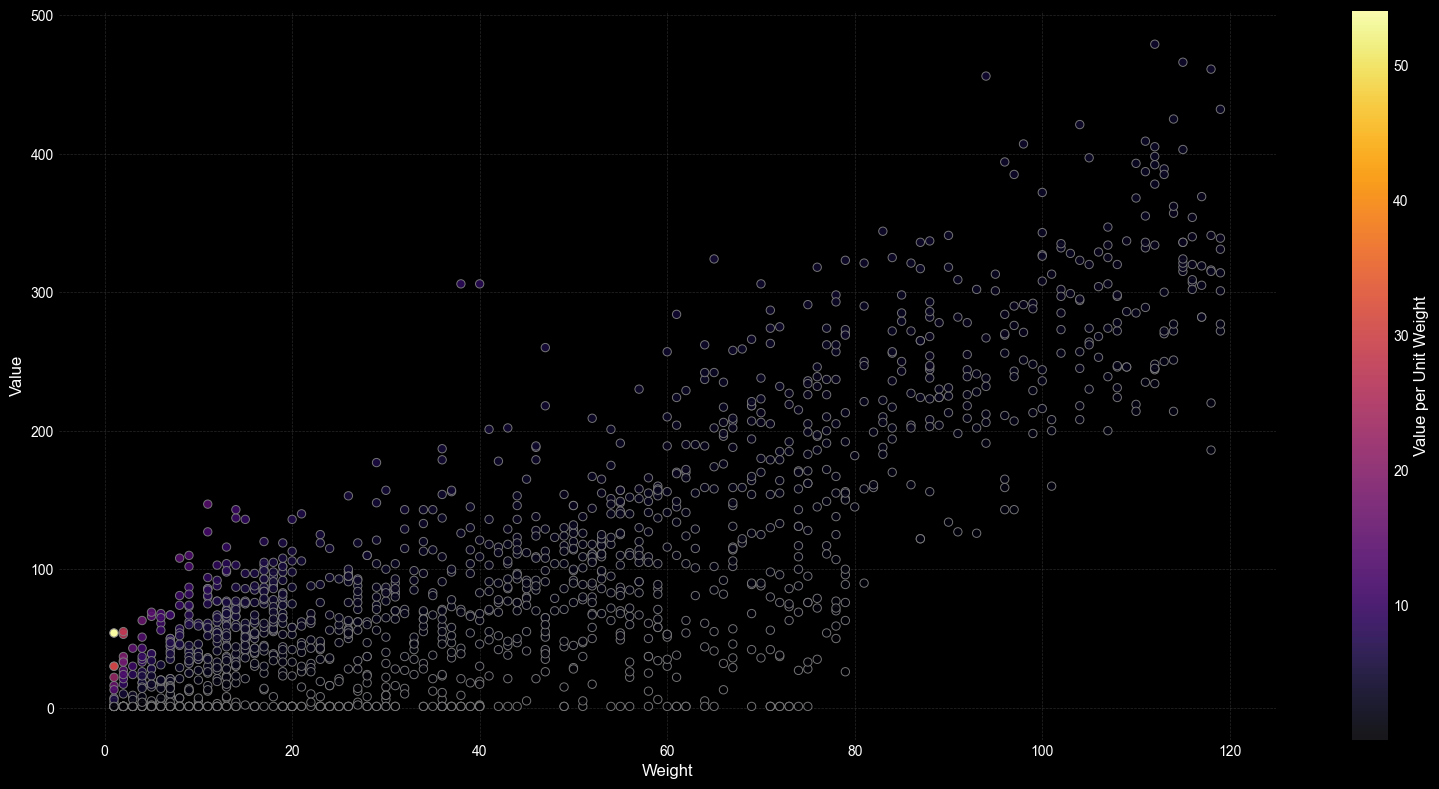

In [4]:
weights = data["weights"]
values = data["values"]

value_per_weight = values / weights

fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

scatter = ax.scatter(
    weights,
    values,
    c=value_per_weight,
    cmap="inferno",
    alpha=0.9,
    edgecolors="gray",
    linewidths=0.7
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Value per Unit Weight", fontsize=12, color="white")
cbar.ax.tick_params(colors="white")

ax.set_xlabel("Weight", fontsize=12, color="white")
ax.set_ylabel("Value", fontsize=12, color="white")

ax.grid(
    True,
    linestyle="--",
    linewidth=0.5,
    alpha=0.3,
    color="gray"
)

ax.tick_params(colors="white")

plt.tight_layout()
plt.show()

$$
\begin{array}{c}
\textbf{0/1 Knapsack Formulation} \\[8pt]
\begin{aligned}
\max \quad & \sum_{i=1}^{n} v_i x_i \\
\text{s.t.} \quad 
& \sum_{i=1}^{n} w_i x_i \le C \\
& x_i \in \{0,1\}, \quad i = 1, \dots, n \\[8pt]
n &= \text{number of items} \\
v_i &= \text{value of item } i \\
w_i &= \text{weight of item } i \\
C &= \text{capacity of the knapsack}
\end{aligned}
\end{array}$$
$
ligned}
$$


In [5]:
weights = data["weights"].tolist()
values = data["values"].tolist()

CAPACITY = 30000

In [6]:
from ortools.sat.python import cp_model

In [7]:
model = cp_model.CpModel()

In [8]:
n_items = len(weights)

In [9]:
xi = [model.NewBoolVar(f"x_{i}") for i in range(n_items)]

In [10]:
model.Add(sum(weights[i] * xi[i] for i in range(n_items))<=CAPACITY)

In [11]:
model.Maximize(sum(values[i] * xi[i] for i in range(n_items)))

In [12]:
solver = cp_model.CpSolver()

In [13]:
result = solver.Solve(model)

In [14]:
result

4

In [15]:
solver.StatusName(result)

'OPTIMAL'

In [16]:
selected_items = [i for i in range(n_items) if solver.Value(xi[i])==1]

In [17]:
total_weight = sum(weights[i] for i in selected_items)
total_weight

30000

In [18]:
total_value = sum(values[i] for i in selected_items)
total_value

102101

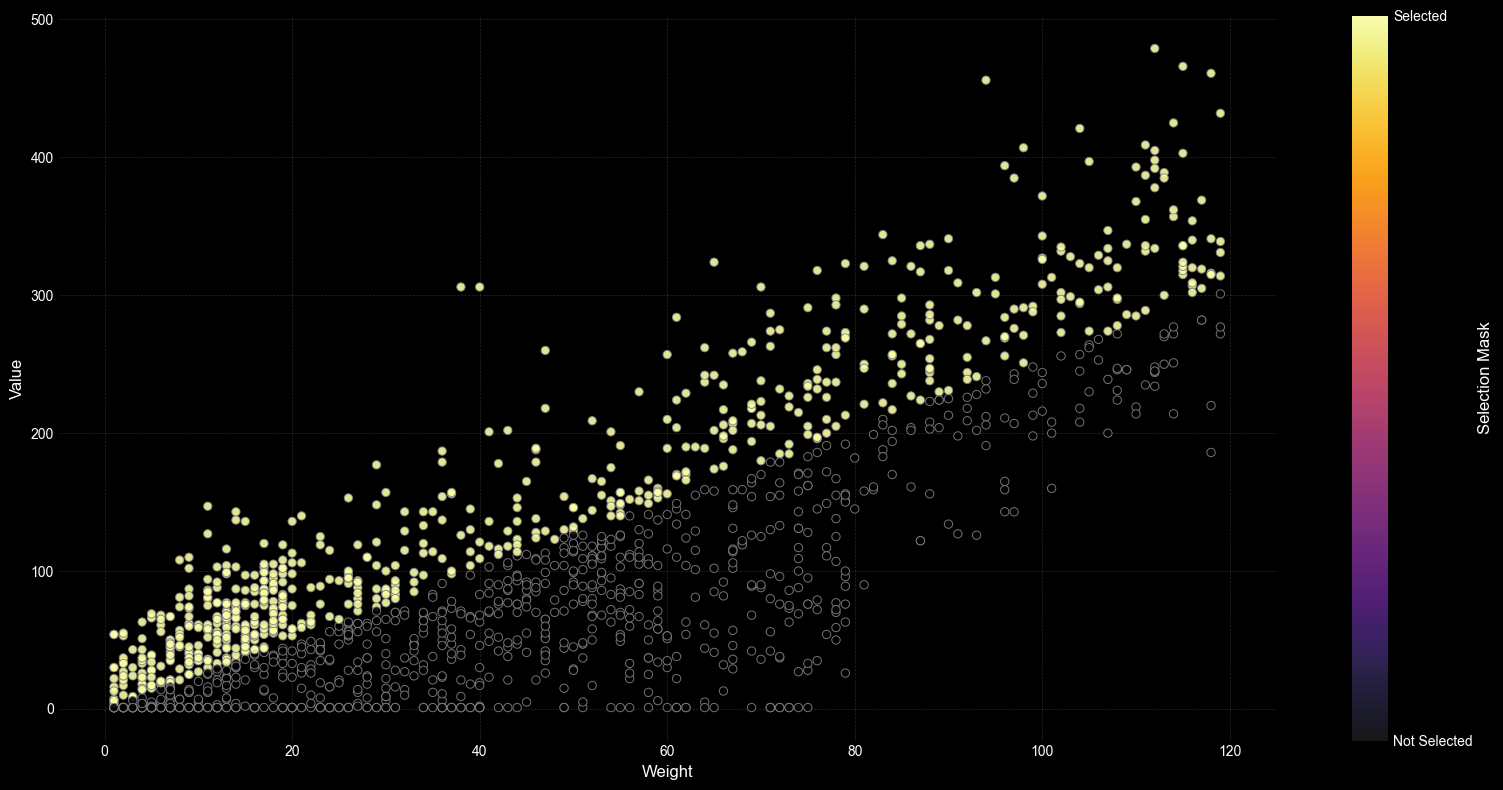

In [19]:
weights = data["weights"]
values = data["values"]

selected_mask = [i in selected_items for i in range(n_items)]

fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

scatter = ax.scatter(
    weights,
    values,
    c=selected_mask,
    cmap="inferno",
    alpha=0.9,
    edgecolors="gray",
    linewidths=0.7
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Selection Mask", fontsize=12, color="white")
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Not Selected", "Selected"])
cbar.ax.tick_params(colors="white")

ax.set_xlabel("Weight", fontsize=12, color="white")
ax.set_ylabel("Value", fontsize=12, color="white")

ax.grid(
    True,
    linestyle="--",
    linewidth=0.5,
    alpha=0.3,
    color="gray"
)

ax.tick_params(colors="white")

plt.tight_layout()
plt.show()